In [1]:
# About the dataset:

# The dataset consists of 5 columns:
# culmen_length_mm: culmen length (mm)
# culmen_depth_mm: culmen depth (mm)
# flipper_length_mm: flipper length (mm)
# body_mass_g: body mass (g)
# sex: penguin sex

In [2]:
# Based on the above features we are going to cluster the penguins. Once the penguins are clustered we can do EDA to 
# determine explict features and compare in between the clusters

In [3]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings("ignore")

In [4]:
# Importing data from the csv file:
df = pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Checking the number of rows and columns
df.shape

(344, 5)

In [6]:
# Checking for null values
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [7]:
# Dropping the null values
df = df.dropna()

In [8]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# checking the data type and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [10]:
# checking back the data once more after data cleaning:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


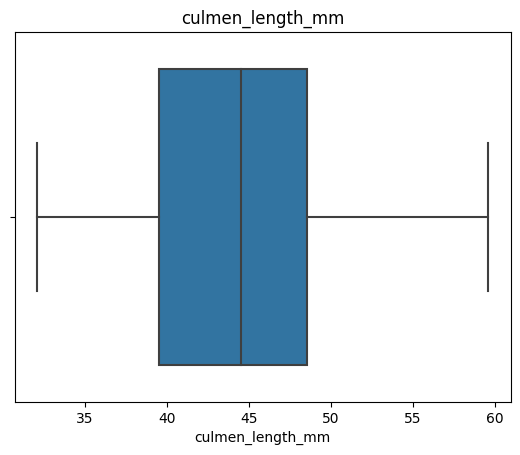

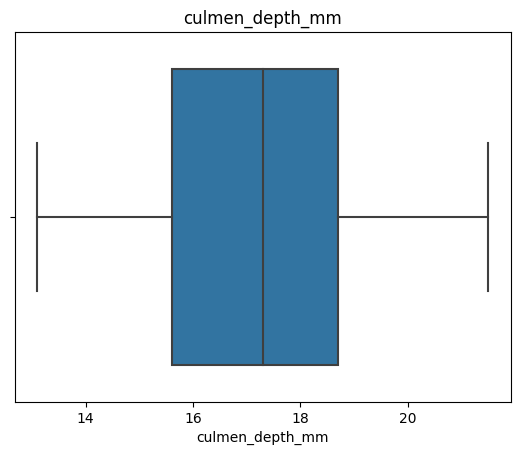

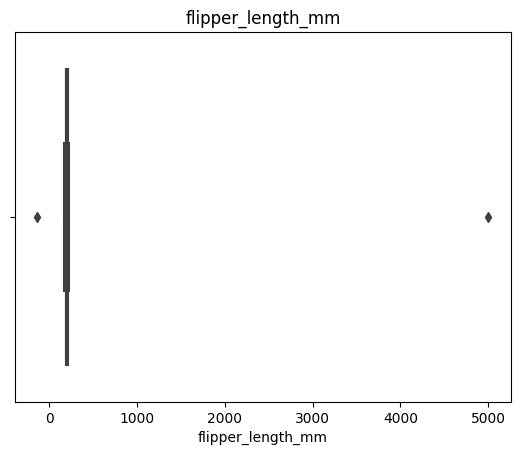

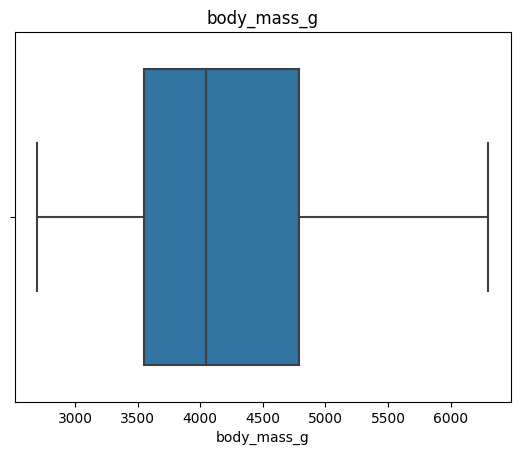

In [11]:
# checking for outliers (Since outliers can badly affect our clustering):
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df,x=col)
        plt.title(col)
        plt.show()

In [12]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [13]:
# treating the outliers:
# There is only one column that has outliers.
out_list = ['flipper_length_mm']
for col in out_list:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    df = df[(df[col]>ll)&(df[col]<ul)]

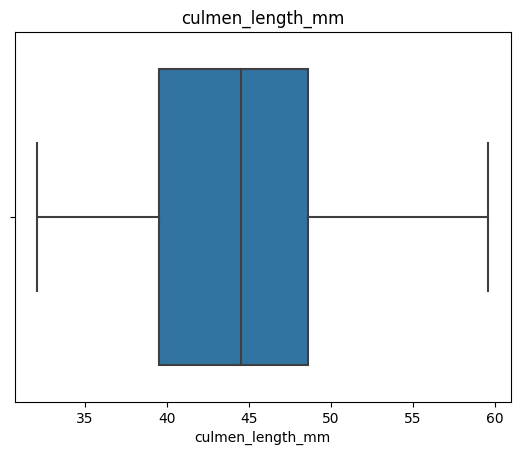

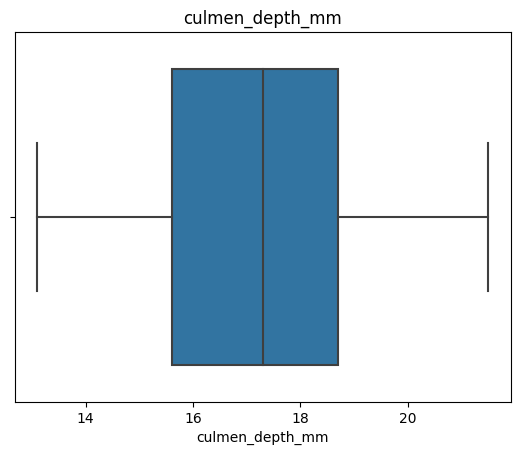

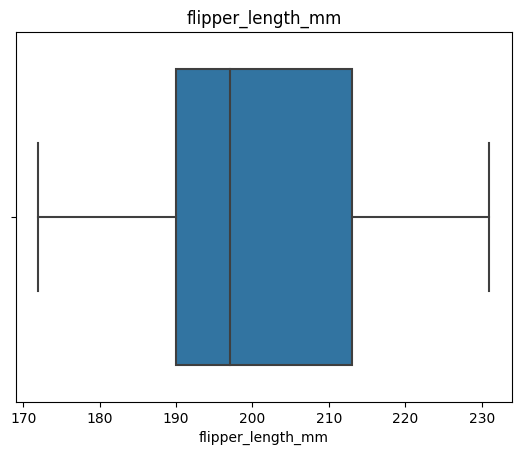

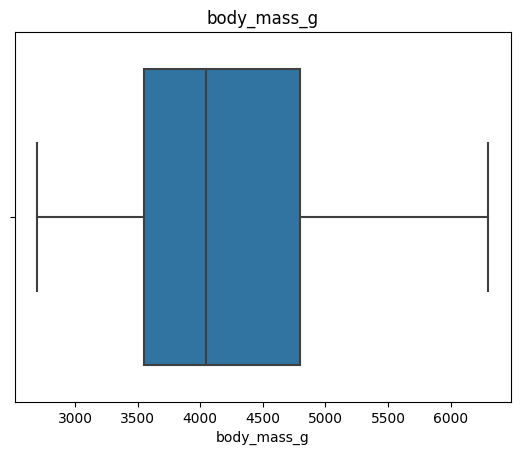

In [14]:
# Lets check the data again:
# checking for outliers 
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df,x=col)
        plt.title(col)
        plt.show()

In [15]:
# Great ! Done

In [16]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [17]:
# Since we are clustering the data and not solving a binary problem we might not need the df['sex'] in this particular way.
# Also clustering works with columns. So, lets split the df['sex'] into two dummy columns. This will help us in our 
# clustering. Now we can utilize the values in this column as separate columns to use it in our clustering.

In [18]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [19]:
df_dummy = pd.get_dummies(df,columns=['sex'],drop_first=True)
df_dummy

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [20]:
df_dummy_copy = df_dummy.copy()

In [21]:
# scaling the features before doing PCA:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
df_dummy_copy_scaled = sc.fit_transform(df_dummy_copy)

In [22]:
df_dummy_copy.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [23]:
# creating a dataframe for the transformed scaled data:
df_dummy_copy_scaled = pd.DataFrame(df_dummy_copy_scaled,columns=df_dummy.columns)

In [24]:
# checking the new dataframe:
df_dummy_copy_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


In [25]:
# Since there are 6 columns lets try doing for better visualization of the clusters. 
# The adavntage of doing PCA is not losing too much information and still reducing the dimensionality 
# for creating nice clusters.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(0.85) 
df_dummy_copy_scaled_pca = pca.fit_transform(df_dummy_copy_scaled) 
pca.n_components_
# Keeping 85% of feature information is enough for us to create a good set of clusters and reduces our dimensionality to 2.
# Lets go ahead with it (to check this I did a trial and error from 95% to 85%. The other way is to go with the classical a bit
# lengthy method)

2

In [27]:
# now lets go ahead and decide how many clusters do we have to keep:
# This will be done by Elbow method 
# If its not clear by Elbow method we would go for the Silhouette method.

# for this first lets import the required module:
from sklearn.cluster import KMeans

# METHOD 1: Elbow method

# if we want to take 2 to 8 then we have to keep range till 9 since the last element is excluded
clusters = range(2,9)

# Lets create a list to contain our WCSS (Within cluster sum of squares)
# less the WCSS the better

ssd = []

for x in clusters:
    km = KMeans(n_clusters = x, random_state = 30)
    km.fit(df_dummy_copy_scaled_pca)
    ssd.append(km.inertia_)
    print(f'The WCSS for {x} clusters is {km.inertia_}')

The WCSS for 2 clusters is 899.7404440438729
The WCSS for 3 clusters is 436.55136086903656
The WCSS for 4 clusters is 128.3919931231332
The WCSS for 5 clusters is 93.95345390530508
The WCSS for 6 clusters is 64.56914056291367
The WCSS for 7 clusters is 55.09567384709461
The WCSS for 8 clusters is 45.64834710934341


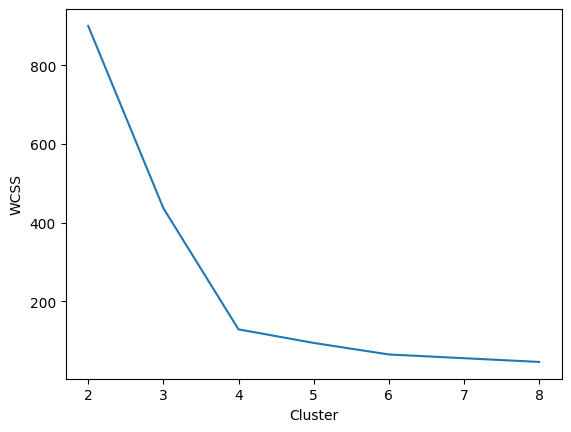

In [28]:
# Not clear from here. Lets plot the elbow and check where we get the elbow point.
plt.plot(clusters,ssd)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

In [29]:
# So, the elbow point is at 4. Lets go ahead with 4 clusters.

In [30]:
# Implementing the same:
km = KMeans(n_clusters = 4, random_state = 30)
km.fit(df_dummy_copy_scaled_pca)

KMeans(n_clusters=4, random_state=30)

In [31]:
df_dummy_copy_scaled_pca

array([[-7.29520694e-01, -2.09719199e+00],
       [-1.92930440e+00,  4.12149703e-01],
       [-1.95352479e+00,  3.08485398e-01],
       [-2.28817761e+00, -1.58277726e-01],
       [-6.21821649e-01, -2.51402049e+00],
       [-2.29152165e+00,  1.26445549e-01],
       [ 2.70680676e-01, -1.85613349e+00],
       [-2.33416049e+00,  1.50781067e-01],
       [-5.97023288e-01, -2.65728372e+00],
       [-2.29097852e+00,  1.91722418e-01],
       [-2.03556313e+00,  1.40926894e-02],
       [ 4.03586127e-01, -2.13984589e+00],
       [-2.78682640e+00, -1.42762052e-01],
       [ 3.26341981e-01, -2.46479526e+00],
       [-2.80192041e+00, -2.54639414e-01],
       [-9.70630285e-01, -2.17804104e+00],
       [-2.25960046e+00, -1.47648262e-01],
       [-4.89541085e-01, -1.79101648e+00],
       [-6.35131373e-01, -1.64334482e+00],
       [-2.35187589e+00, -1.08021864e-01],
       [-6.59573801e-01, -2.04230703e+00],
       [-2.23509243e+00,  1.56193095e-01],
       [-3.04481322e+00, -4.48467094e-01],
       [-5.

In [32]:
# each record in the 'df_dummy_scaled_pca' has now cluster labels. Lets put them into the DataFrame
km.labels_

array([1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,

In [35]:
df_dummy['PC1'] = df_dummy_copy_scaled_pca[:,0]
df_dummy['PC2'] = df_dummy_copy_scaled_pca[:,1]
df_dummy['cluster'] = km.labels_ 

In [36]:
df_dummy.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,PC1,PC2,cluster
0,39.1,18.7,181.0,3750.0,0,1,-0.729521,-2.097192,1
1,39.5,17.4,186.0,3800.0,1,0,-1.929304,0.412150,2
2,40.3,18.0,195.0,3250.0,1,0,-1.953525,0.308485,2
4,36.7,19.3,193.0,3450.0,1,0,-2.288178,-0.158278,2
5,39.3,20.6,190.0,3650.0,0,1,-0.621822,-2.514020,1


In [47]:
df_dummy['cluster'].nunique()

4

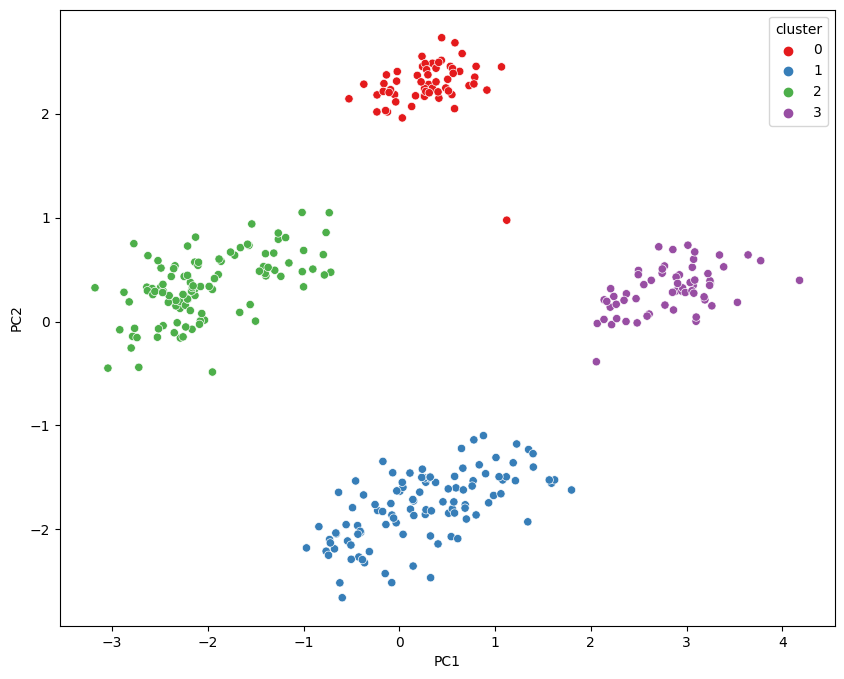

In [68]:
# Plotting the clusters using PC1 andPC2 finally:
plt.figure(figsize = (10, 8))
sns.scatterplot(x=df_dummy['PC1'],y=df_dummy['PC2'],hue=df_dummy['cluster'],palette='Set1') 
plt.show()

In [72]:
# If you want more information about each point you can use plotly:
import plotly.express as px
fig = px.scatter(df_dummy, x='PC1', y='PC2', color='cluster')
fig.update_layout(height=600, width=800)
fig.show()